# Benchmarking Results

In [1]:
from capo.analysis.utils import (
    get_results,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    plot_population_members,
    plot_population_scores_comparison,
    plot_length_score,
    plot_performance_profile_curve,
    plot_train_test_comparison,
)

import os

os.chdir("../../")

c:\Users\schla\AppData\Local\pypoetry\Cache\virtualenvs\capo-JzHO-Y9b-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-30 10:56:10,224	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
OPTIMS = ["CAPO", "OPRO", "EvoPromptGA", "PromptWizard", "Initial"]
OPTIMS_NO_WIZ = ["CAPO", "EvoPromptGA", "OPRO", "Initial"]
OPTIMS_NO_SING = ["CAPO", "EvoPromptGA", "OPRO"]
DATASETS = ["sst-5", "agnews", "copa", "gsm8k", "subj"]
MODELS = ["llama", "qwen", "mistral"]

We always use mean for aggregation since this better depicts the overall optimization process.

# Performance Profile

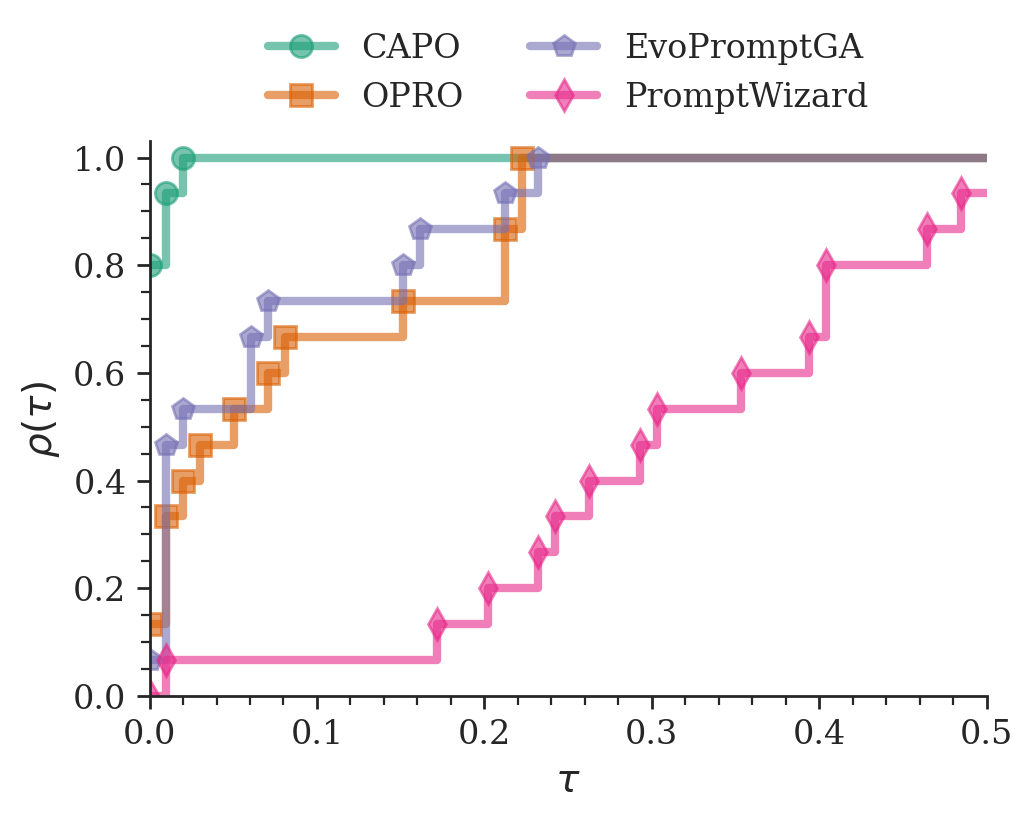

In [3]:
plot_performance_profile_curve();

# Benchmark Results

## Mistral

In [4]:
generate_comparison_table(model="mistral")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±2.94,72.21±7.45,61.65±6.04,33.71±5.89,94.56±0.94,62.17
OPRO,53.20±2.83,84.20±0.16,77.07±0.09,43.53±0.47,96.33±0.34,70.87
PromptWizard,31.07±3.80,44.40±25.76,59.00±5.09,48.67±6.46,57.47±10.28,48.12
EvoPromptGA,54.93±0.94,84.40±0.28,74.93±2.04,43.93±3.85,96.13±0.34,70.87
CAPO,60.20±0.33,84.33±2.13,81.67±1.64,65.07±1.20,95.13±1.20,77.28


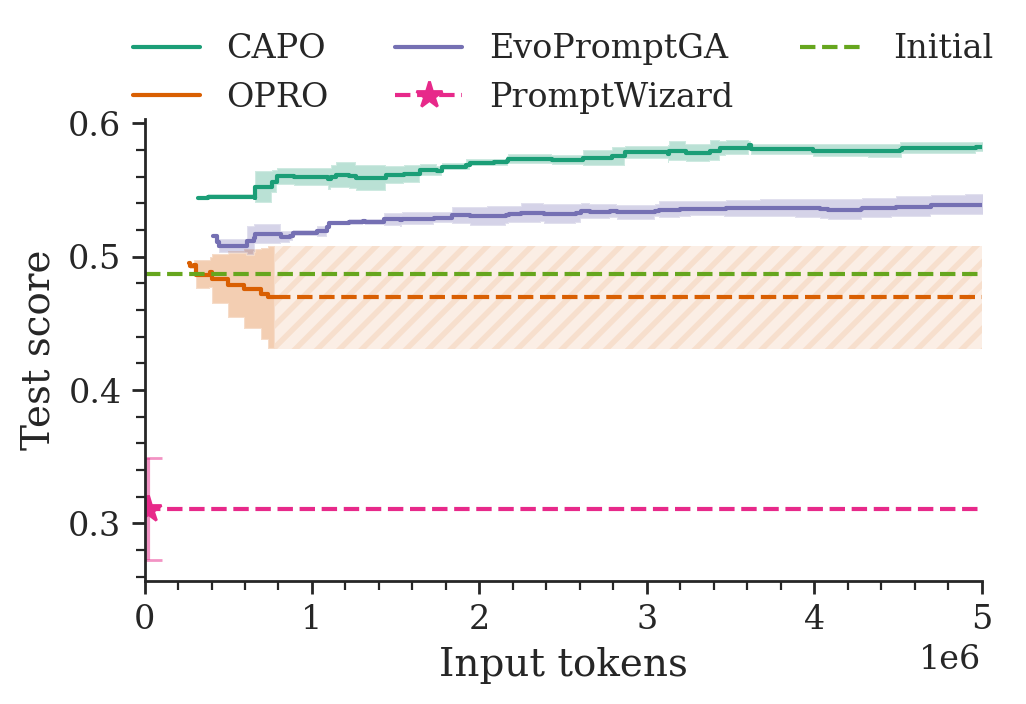

In [5]:
plot_population_scores_comparison(
    "sst-5",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    figsize=(5.4, 3),
);

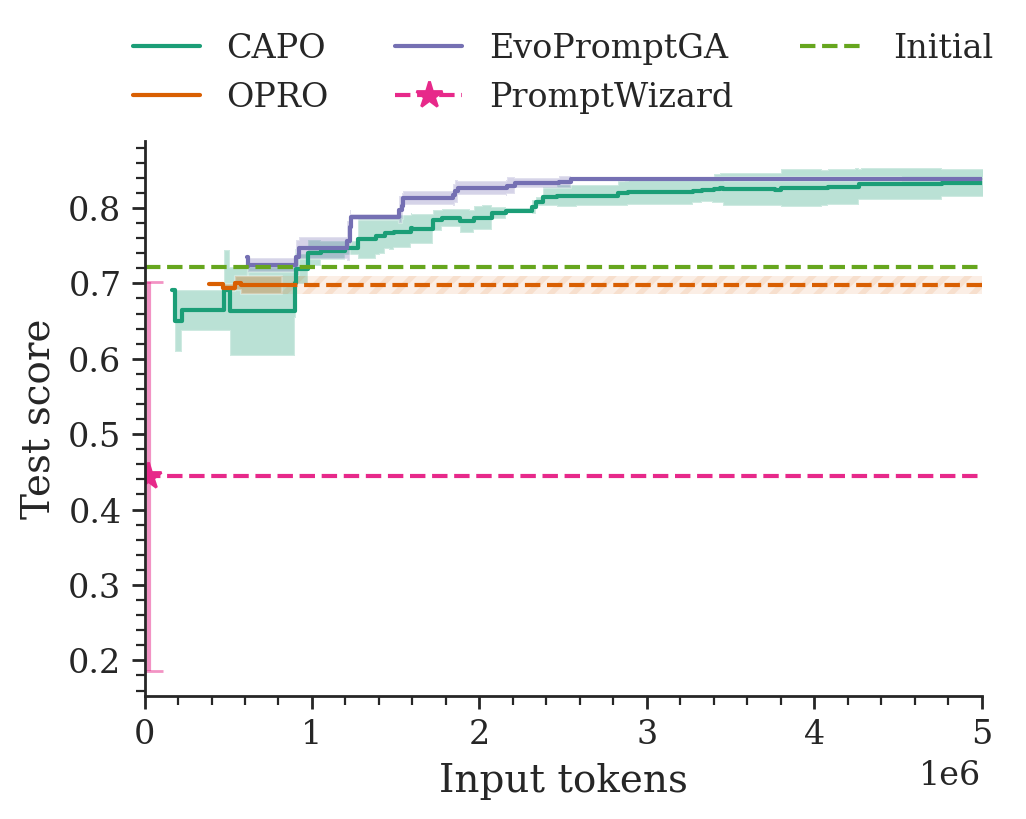

In [6]:
plot_population_scores_comparison(
    "agnews",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

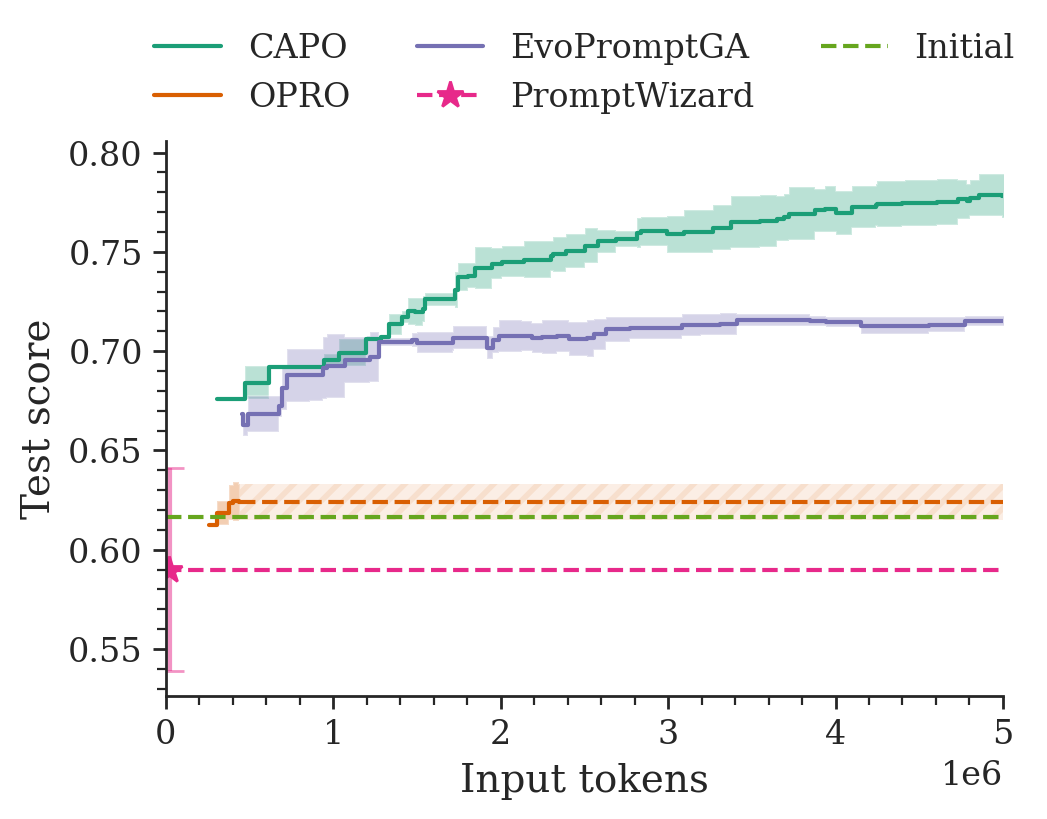

In [7]:
plot_population_scores_comparison(
    "subj",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

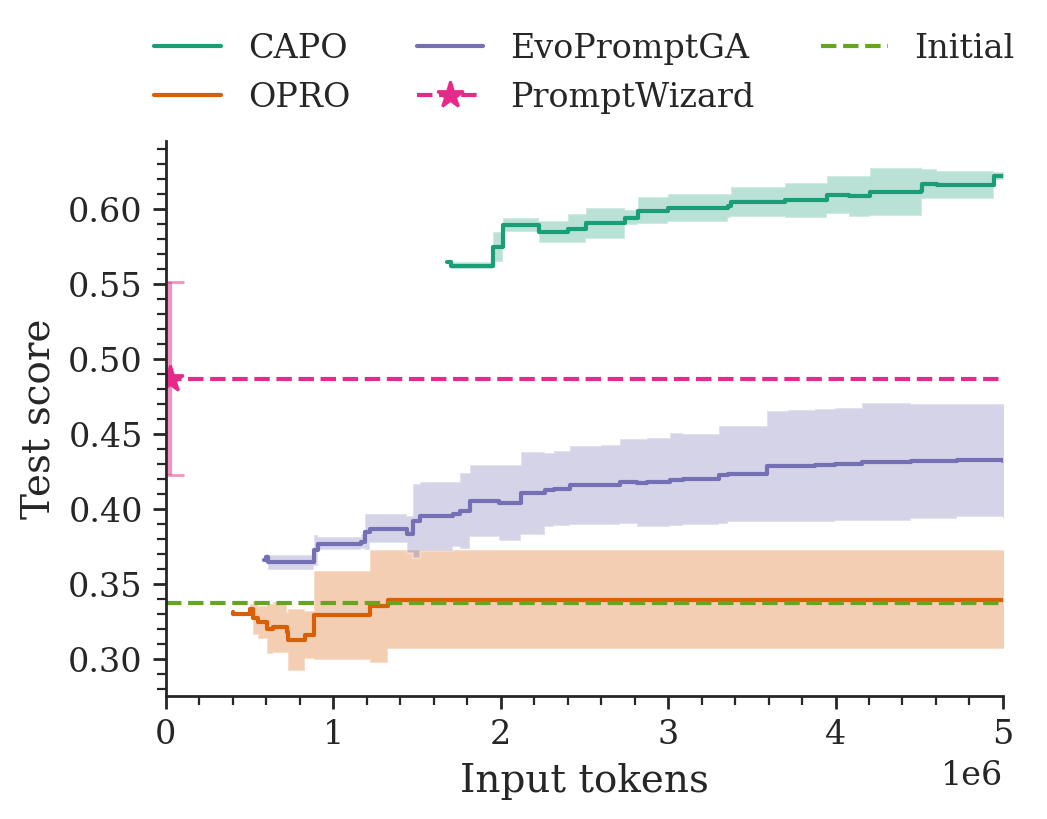

In [8]:
plot_population_scores_comparison(
    "gsm8k",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

--> use in main paper next to table

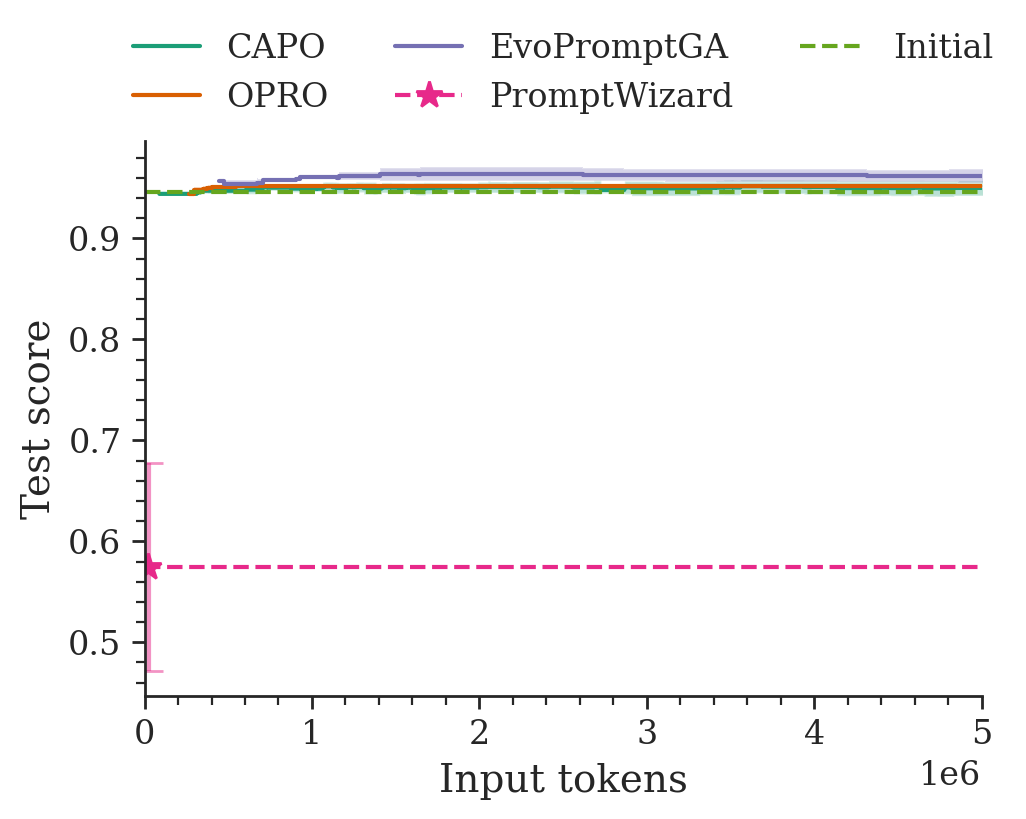

In [9]:
plot_population_scores_comparison(
    "copa",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

In [10]:
import seaborn as sns

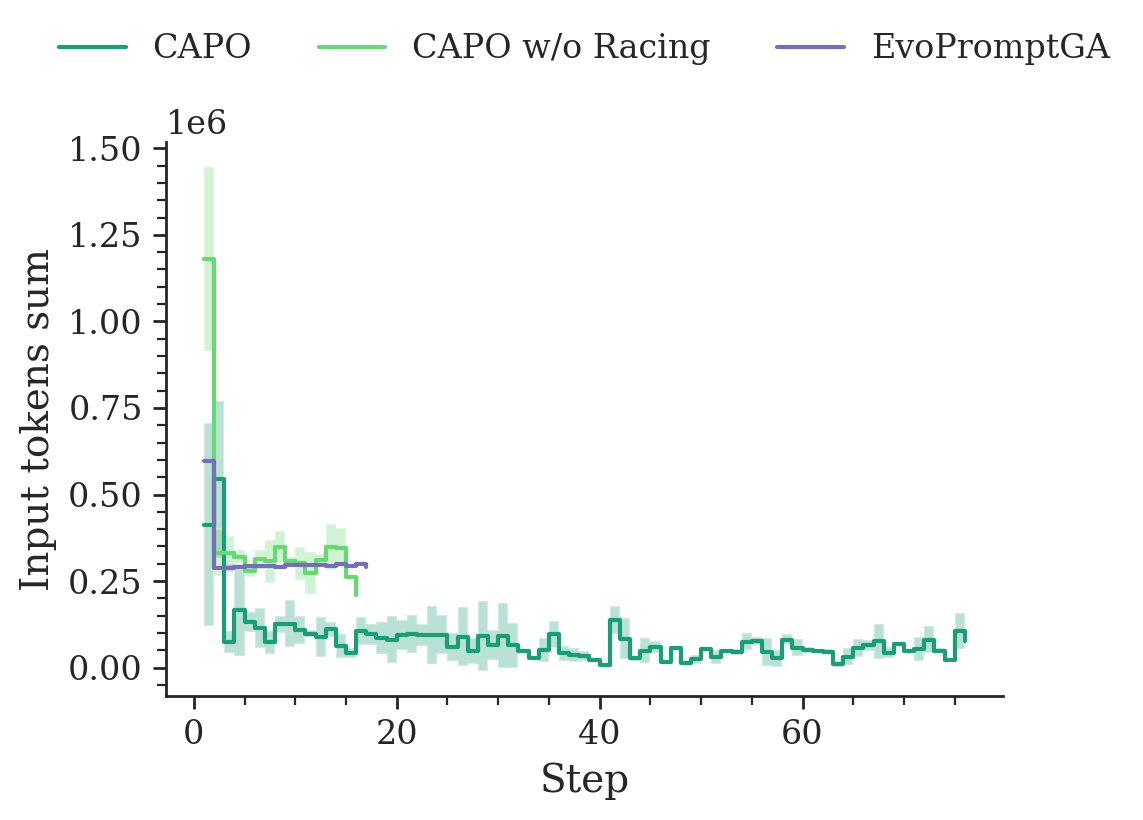

In [11]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO", "CAPO_no_racing", "EvoPromptGA"],
    colors=[sns.color_palette("Dark2")[0], "#66D874", sns.color_palette("Dark2")[2]],
    labels=["CAPO", "CAPO w/o Racing", "EvoPromptGA"],
    agg="mean",
    plot_seeds=False,
    plot_stddev=1,
    x_col="step",
    score_col="input_tokens_sum",
);

Failed to load subj for : No objects to concatenate


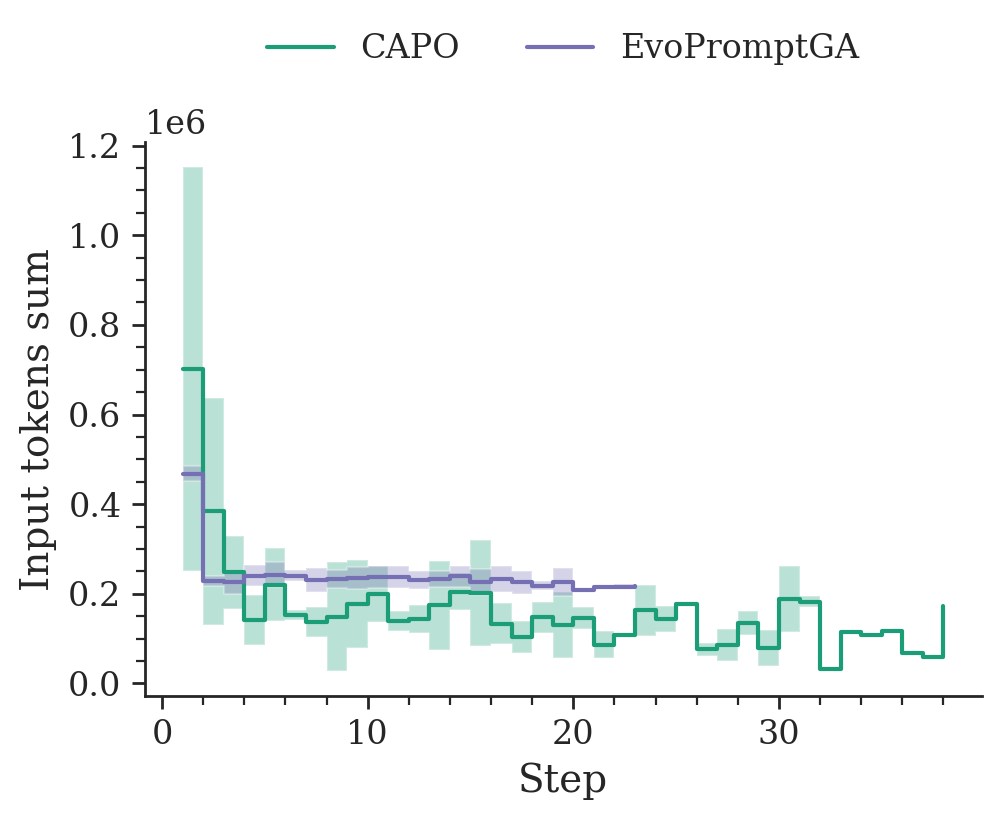

In [12]:
plot_population_scores_comparison(
    "subj",
    "mistral",
    ["CAPO", "", "EvoPromptGA"],
    agg="mean",
    plot_seeds=False,
    plot_stddev=1,
    x_col="step",
    score_col="input_tokens_sum",
);

## Qwen

In [13]:
generate_comparison_table(model="qwen")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±1.94,79.57±0.84,62.85±4.53,33.08±7.78,98.27±0.43,66.09
OPRO,57.00±0.43,79.87±0.19,70.67±2.36,46.33±3.07,98.67±0.34,70.51
PromptWizard,39.73±12.31,63.47±28.49,64.93±5.01,15.27±20.19,98.13±0.19,56.31
EvoPromptGA,58.60±1.73,81.73±1.68,75.87±3.58,61.27±8.39,97.87±0.66,75.07
CAPO,59.07±0.50,87.07±0.81,91.00±0.65,60.20±4.82,98.47±0.19,79.16


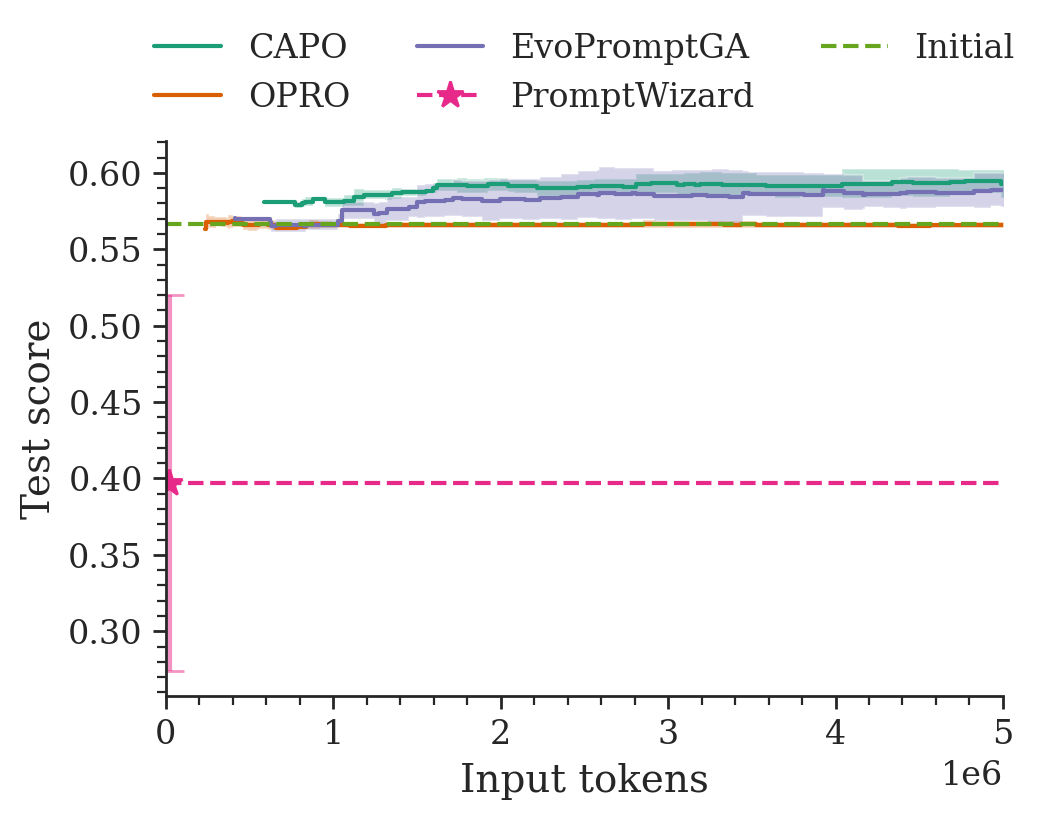

In [14]:
plot_population_scores_comparison(
    "sst-5",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

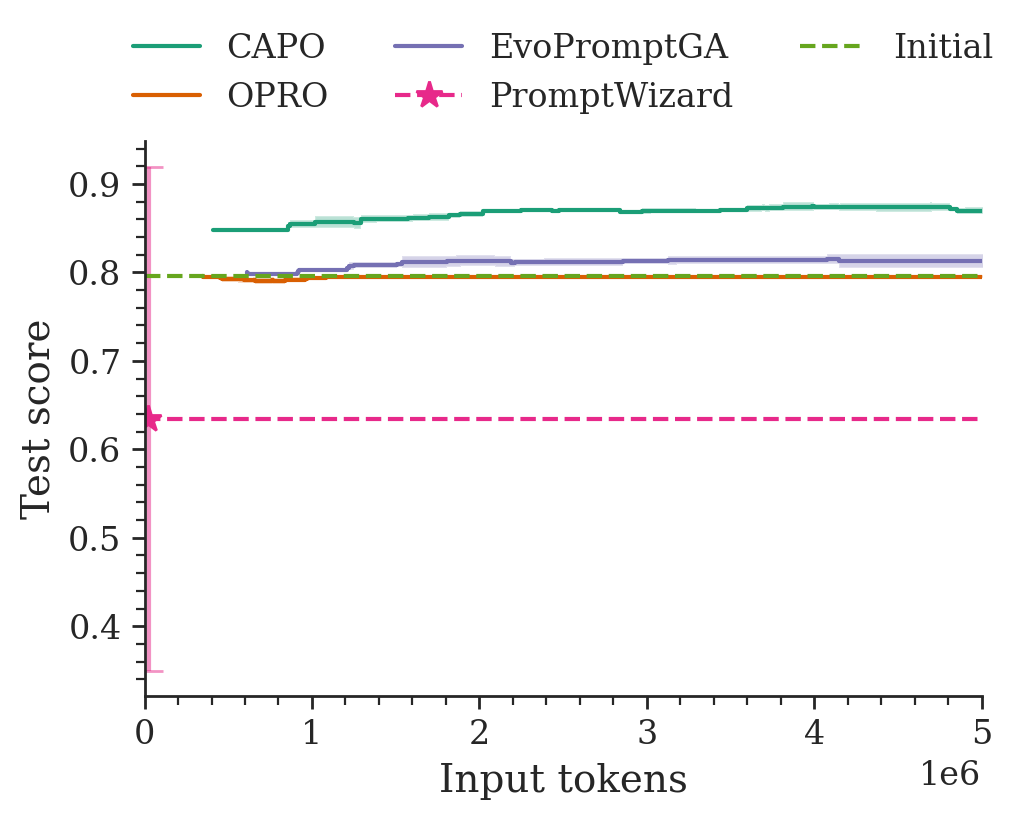

In [15]:
plot_population_scores_comparison(
    "agnews",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

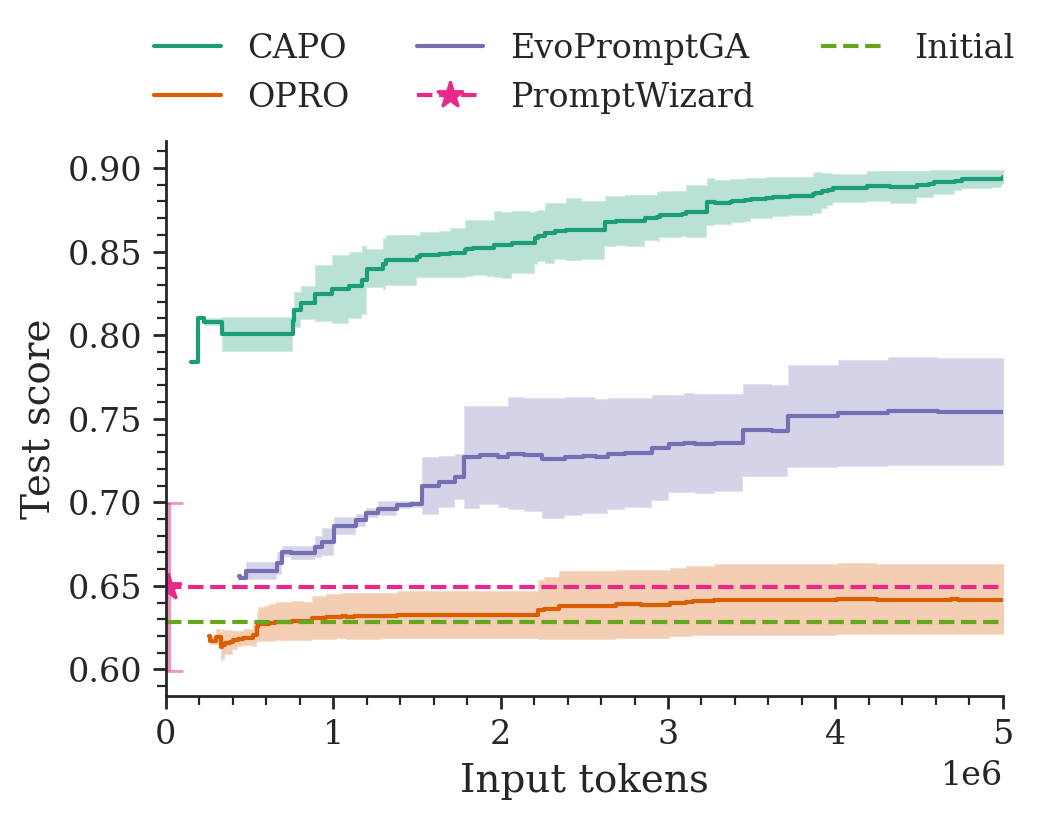

In [16]:
plot_population_scores_comparison(
    "subj",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

--> use in main paper on first side because it is beautiful 💕

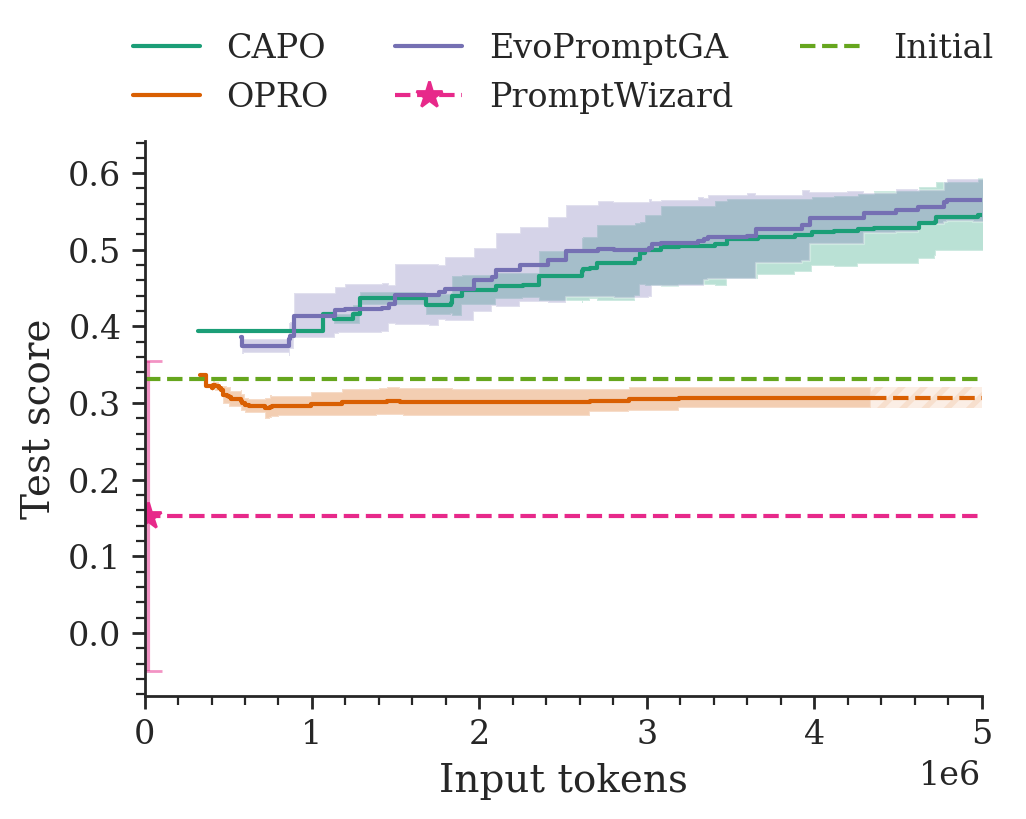

In [17]:
plot_population_scores_comparison(
    "gsm8k",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

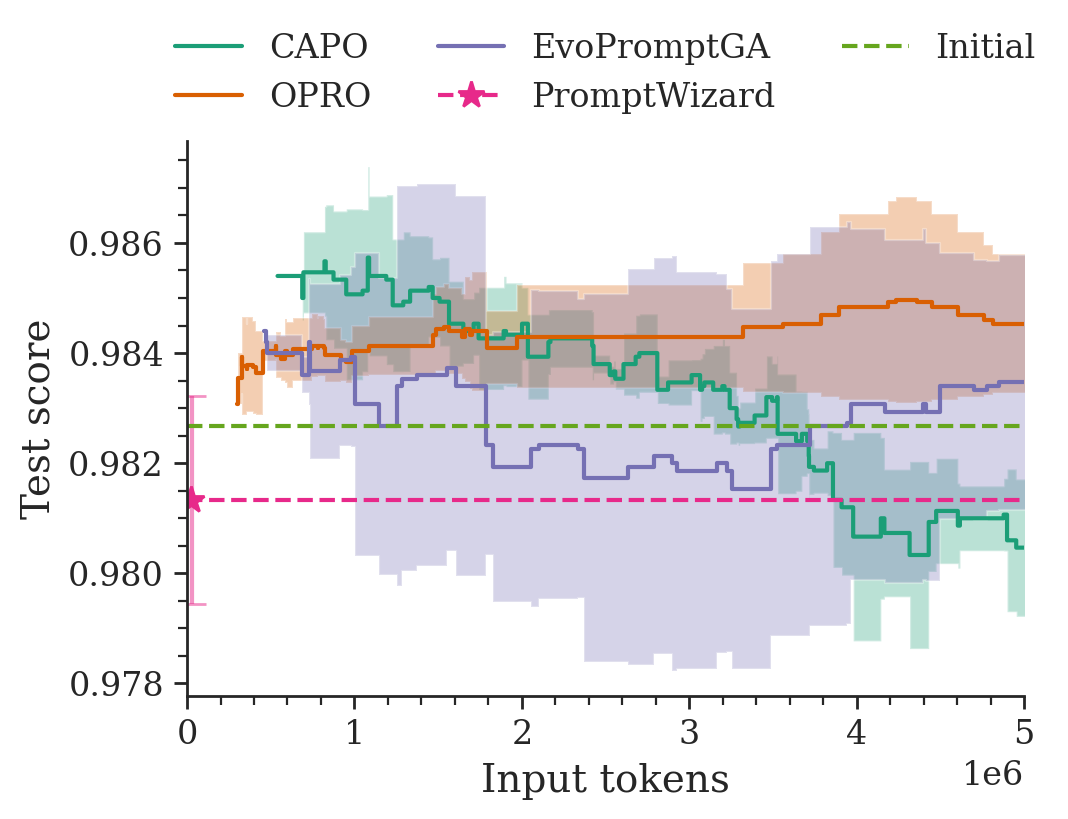

In [18]:
plot_population_scores_comparison(
    "copa",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

## Llama

In [19]:
generate_comparison_table(model="llama")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.53,87.06±0.65,62.00±5.22,44.28±4.91,97.65±1.31,69.89
OPRO,60.87±1.09,88.20±0.49,71.33±2.80,51.87±2.04,98.07±0.57,74.07
PromptWizard,32.80±1.73,23.33±0.19,51.93±0.25,39.33±15.09,50.33±0.34,39.55
EvoPromptGA,60.53±1.37,88.67±0.41,75.53±1.39,50.87±0.74,97.60±1.13,74.64
CAPO,62.27±0.34,88.80±0.75,91.60±2.16,73.73±3.73,98.27±0.52,82.93


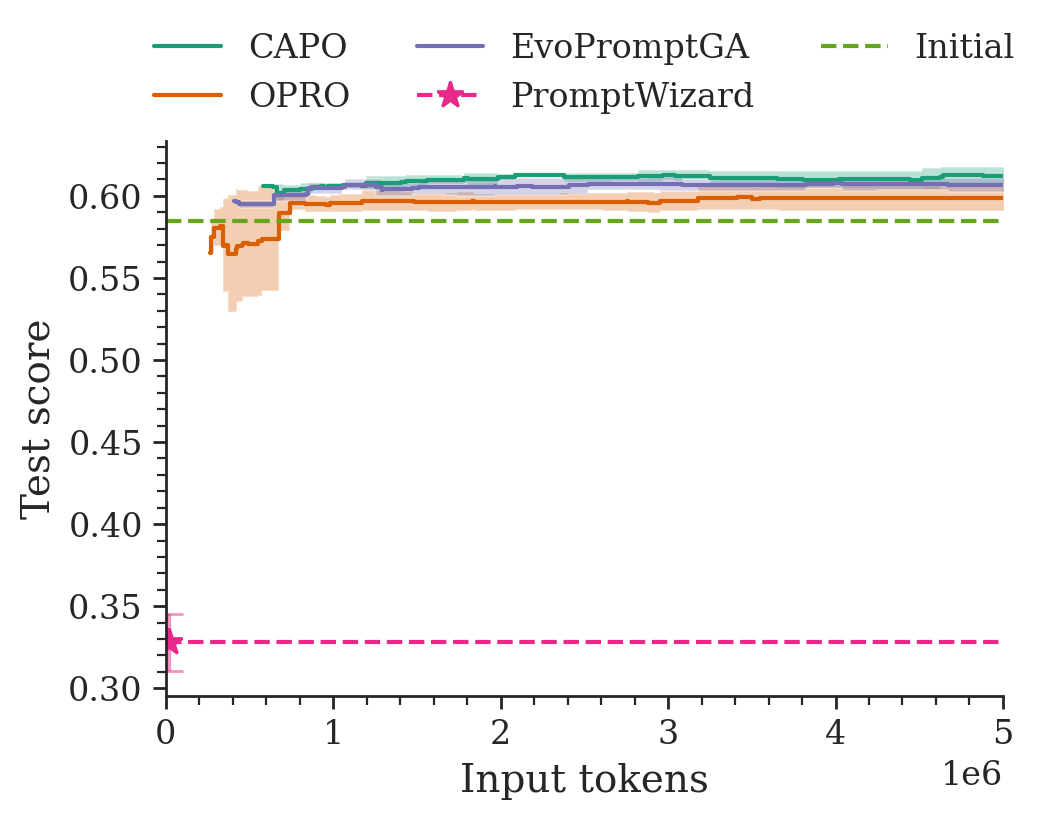

In [20]:
plot_population_scores_comparison(
    "sst-5",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

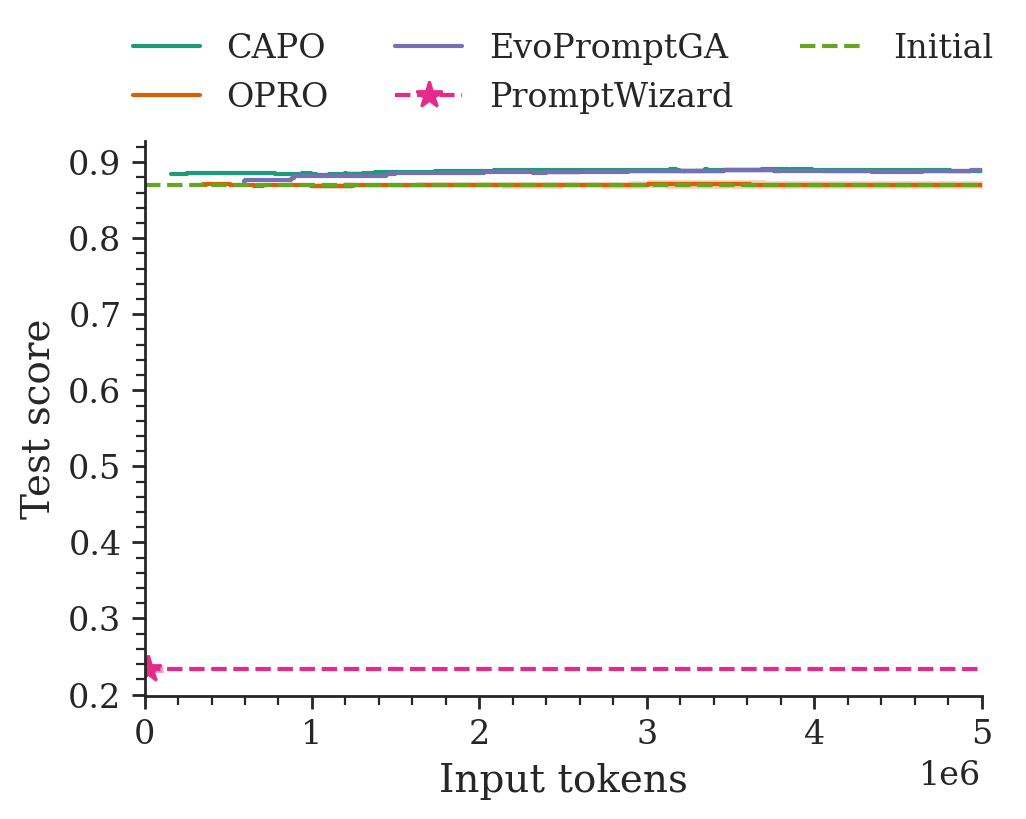

In [21]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

PromptWizard performs really bad for Llama

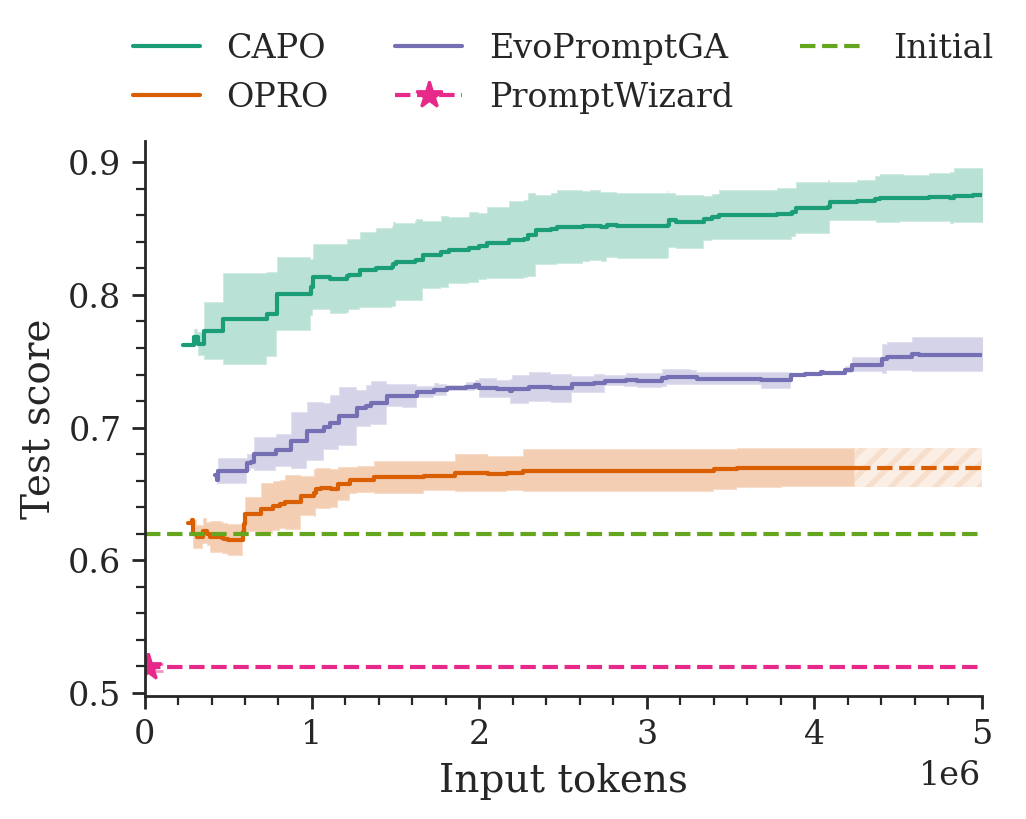

In [22]:
plot_population_scores_comparison(
    "subj",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

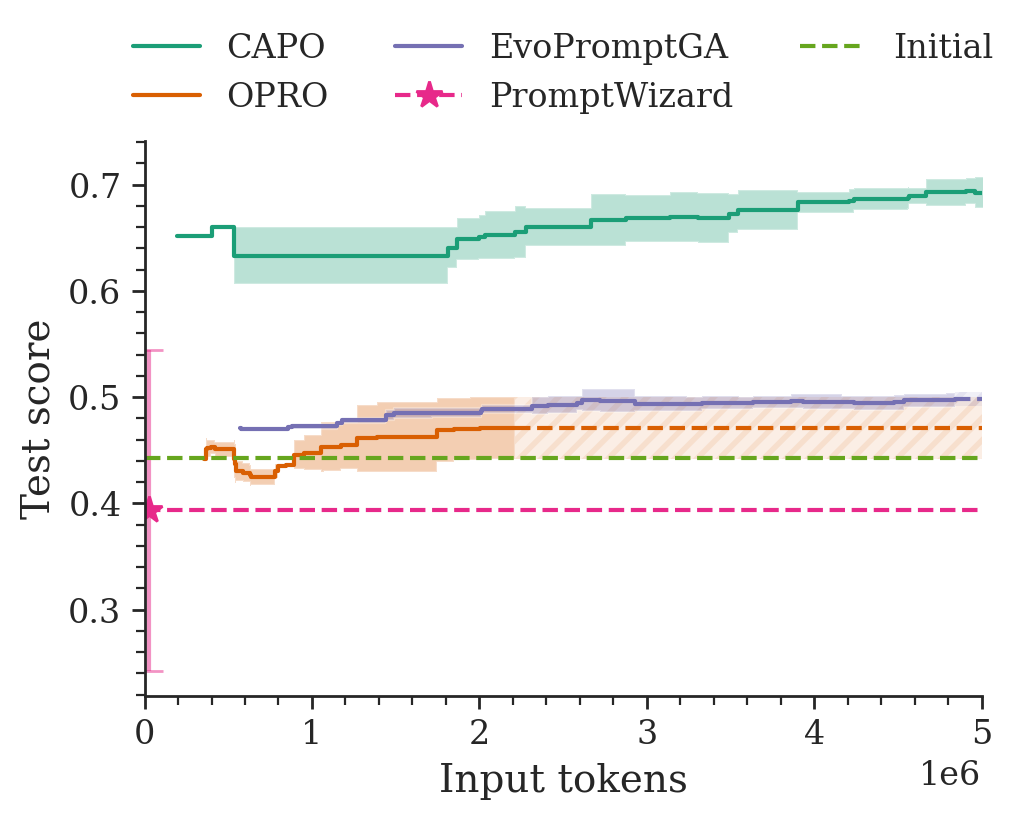

In [23]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    OPTIMS,
    agg="mean",
    plot_stddev=True,
    x_col="input_tokens_cum",
    n_seeds_to_plot_std=1,
);

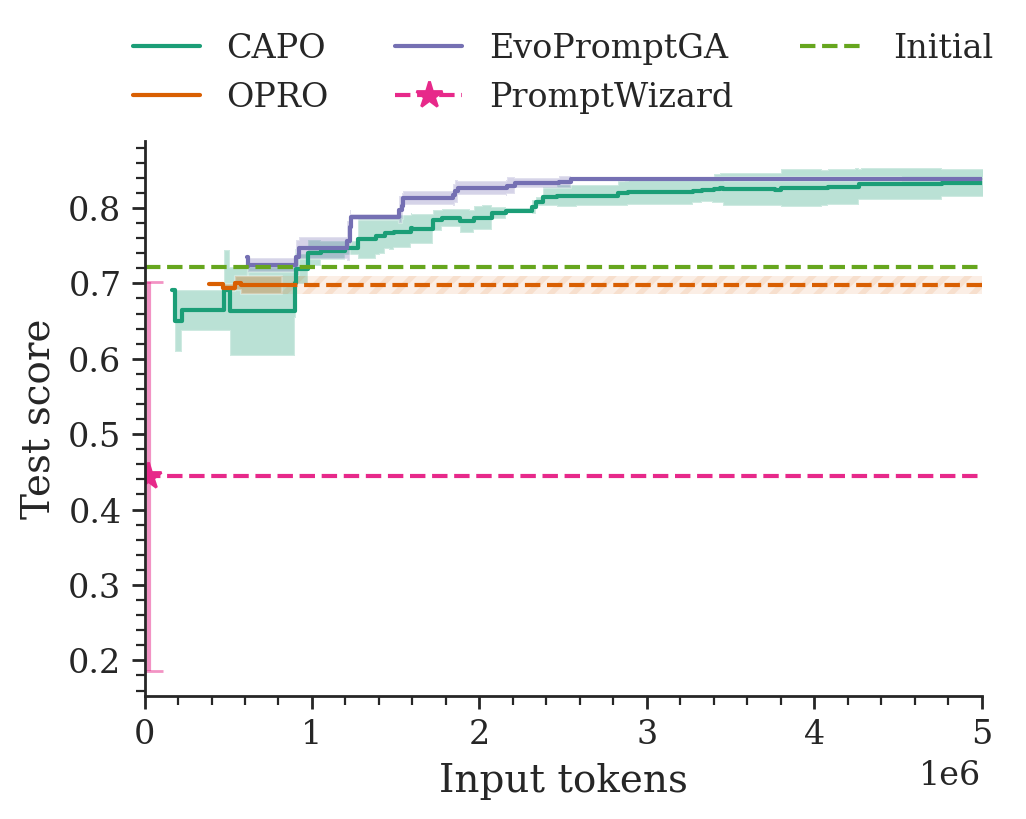

In [24]:
plot_population_scores_comparison(
    "agnews",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
);

Candidates for main paper
- GSM8K (because its most relevant dataset)
- Subj using qwen (because it has beautiful curves)

Takeaways:
- PromptWizard's performance is highly dependend on model used (=> strict templates!)

# Table Results

In [25]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model, cutoff_tokens=1_000_000))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.53,87.06±0.65,62.00±5.22,44.28±4.91,97.65±1.31,69.89
OPRO,59.33±1.23,88.20±0.49,71.33±2.80,51.73±1.88,98.07±0.57,73.73
PromptWizard,32.80±1.73,23.33±0.19,51.93±0.25,39.33±15.09,50.33±0.34,39.55
EvoPromptGA,60.47±1.33,88.73±0.41,74.27±2.51,50.20±0.71,98.53±0.19,74.44
CAPO,61.67±0.82,89.20±0.59,90.00±0.28,76.50±2.50,98.27±0.52,83.13


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±1.94,79.57±0.84,62.85±4.53,33.08±7.78,98.27±0.43,66.09
OPRO,57.40±0.16,80.00±0.00,69.40±0.57,46.33±3.07,98.53±0.19,70.33
PromptWizard,39.73±12.31,63.47±28.49,64.93±5.01,15.27±20.19,98.13±0.19,56.31
EvoPromptGA,57.07±0.66,80.27±0.74,71.93±1.57,54.33±11.27,98.33±0.57,72.39
CAPO,59.87±0.93,87.27±0.84,87.13±1.80,54.40±0.00,98.67±0.25,77.47


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±2.94,72.21±7.45,61.65±6.04,33.71±5.89,94.56±0.94,62.17
OPRO,53.20±2.83,84.20±0.16,77.07±0.09,43.53±0.47,96.33±0.34,70.87
PromptWizard,31.07±3.80,44.40±25.76,59.00±5.09,48.67±6.46,57.47±10.28,48.12
EvoPromptGA,54.20±1.98,83.87±1.25,77.80±0.00,41.13±2.92,96.33±0.62,70.67
CAPO,56.73±1.18,84.13±1.59,77.00±2.00,nan±nan,95.40±1.07,78.32


In [26]:
for model in MODELS:
    print(f"Model: {model}")
    display(generate_comparison_table(model=model, cutoff_tokens=3_000_000))

Model: llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.53,87.06±0.65,62.00±5.22,44.28±4.91,97.65±1.31,69.89
OPRO,61.73±1.09,88.20±0.49,71.33±2.80,51.87±2.04,98.07±0.57,74.24
PromptWizard,32.80±1.73,23.33±0.19,51.93±0.25,39.33±15.09,50.33±0.34,39.55
EvoPromptGA,60.53±1.37,88.93±0.52,74.93±1.09,51.27±0.96,97.40±1.02,74.61
CAPO,62.33±0.38,89.47±0.34,88.13±1.93,74.80±3.15,98.27±0.52,82.60


Model: qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±1.94,79.57±0.84,62.85±4.53,33.08±7.78,98.27±0.43,66.09
OPRO,57.40±0.16,79.87±0.19,70.67±2.36,46.33±3.07,98.47±0.25,70.55
PromptWizard,39.73±12.31,63.47±28.49,64.93±5.01,15.27±20.19,98.13±0.19,56.31
EvoPromptGA,58.07±2.38,81.67±0.96,75.20±3.22,59.13±11.37,97.87±0.66,74.39
CAPO,59.93±0.74,87.00±0.59,89.93±1.47,58.53±2.96,98.20±0.28,78.72


Model: mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±2.94,72.21±7.45,61.65±6.04,33.71±5.89,94.56±0.94,62.17
OPRO,53.20±2.83,84.20±0.16,77.07±0.09,43.53±0.47,96.33±0.34,70.87
PromptWizard,31.07±3.80,44.40±25.76,59.00±5.09,48.67±6.46,57.47±10.28,48.12
EvoPromptGA,54.60±0.82,84.40±0.28,73.73±3.27,43.00±2.87,96.13±0.34,70.37
CAPO,60.20±0.33,84.00±1.77,80.07±1.00,63.20±3.83,95.13±1.20,76.52


In [27]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.53,87.06±0.65,62.00±5.22,44.28±4.91,97.65±1.31,69.89
OPRO,60.87±1.09,88.20±0.49,71.33±2.80,51.87±2.04,98.07±0.57,74.07
PromptWizard,32.80±1.73,23.33±0.19,51.93±0.25,39.33±15.09,50.33±0.34,39.55
EvoPromptGA,60.53±1.37,88.67±0.41,75.53±1.39,50.87±0.74,97.60±1.13,74.64
CAPO,62.27±0.34,88.80±0.75,91.60±2.16,73.73±3.73,98.27±0.52,82.93


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±1.94,79.57±0.84,62.85±4.53,33.08±7.78,98.27±0.43,66.09
OPRO,57.00±0.43,79.87±0.19,70.67±2.36,46.33±3.07,98.67±0.34,70.51
PromptWizard,39.73±12.31,63.47±28.49,64.93±5.01,15.27±20.19,98.13±0.19,56.31
EvoPromptGA,58.60±1.73,81.73±1.68,75.87±3.58,61.27±8.39,97.87±0.66,75.07
CAPO,59.07±0.50,87.07±0.81,91.00±0.65,60.20±4.82,98.47±0.19,79.16


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±2.94,72.21±7.45,61.65±6.04,33.71±5.89,94.56±0.94,62.17
OPRO,53.20±2.83,84.20±0.16,77.07±0.09,43.53±0.47,96.33±0.34,70.87
PromptWizard,31.07±3.80,44.40±25.76,59.00±5.09,48.67±6.46,57.47±10.28,48.12
EvoPromptGA,54.93±0.94,84.40±0.28,74.93±2.04,43.93±3.85,96.13±0.34,70.87
CAPO,60.20±0.33,84.33±2.13,81.67±1.64,65.07±1.20,95.13±1.20,77.28


If we cutoff very early (already at 1_000_000 we outperform the other optimizers in nearly all cases)

## Prompt Length Analysis

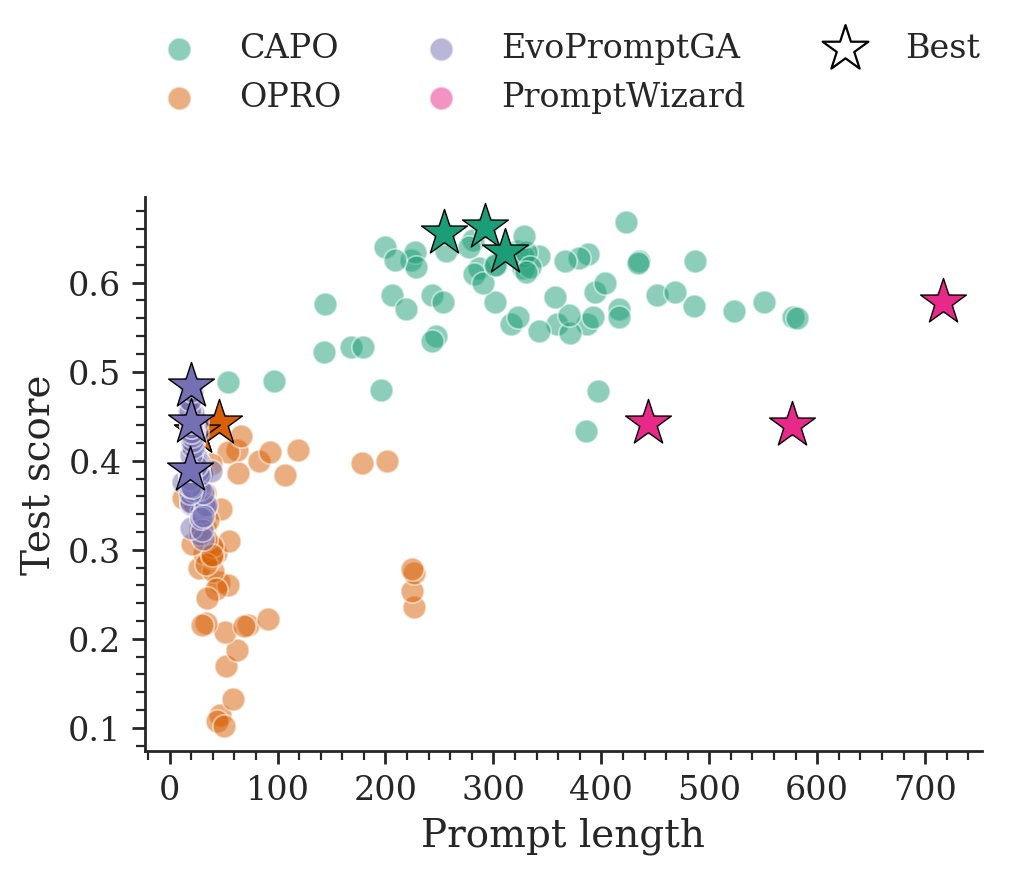

In [41]:
plot_length_score(
    "gsm8k",
    "mistral",
    ["CAPO", "OPRO", "EvoPromptGA", "PromptWizard"],
    x_col="prompt_len",
    score_col="test_score",
    log_scale=False,
);

=> maybe we are cost aware in the sense that we are evaluating the entire "front" (EvoPrompt and Opro are very short and Promptwizard very long)

- promptwizard has extremly long prompts, that only sometimes can compete with competitors

=> interesting for plotting: 
- subj using qwen or gsm8k using mistral => shows that we have a huge range

## Prompt Length Tables

In [29]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model, score_col="prompt_len"))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,33.20±4.50,34.62±5.70,30.67±8.44,29.07±6.89,30.27±5.20,31.56
OPRO,63.00±21.77,31.67±3.77,42.33±3.86,58.00±14.70,33.33±7.41,45.67
PromptWizard,562.67±35.52,1106.33±264.57,863.00±399.56,543.67±172.82,612.67±33.21,737.67
EvoPromptGA,32.67±2.49,30.00±0.82,25.00±5.72,27.67±2.05,32.00±2.45,29.47
CAPO,161.00±84.50,110.33±45.57,157.67±12.26,480.67±112.90,83.00±21.60,198.53


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,33.20±4.50,34.62±5.70,30.67±8.44,29.07±6.89,30.27±5.20,31.56
OPRO,37.67±5.44,37.00±8.49,32.67±4.71,26.67±2.36,51.33±14.06,37.07
PromptWizard,677.33±517.10,753.33±541.43,296.67±22.29,698.00±391.85,337.00±31.89,552.47
EvoPromptGA,37.00±3.74,34.67±5.79,35.33±5.44,24.67±6.02,40.00±9.42,34.33
CAPO,187.33±27.79,116.00±56.17,158.00±13.49,229.67±89.13,104.67±49.24,159.13


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,33.20±4.50,34.62±5.70,30.67±8.44,29.07±6.89,30.27±5.20,31.56
OPRO,29.33±1.89,44.00±7.07,26.00±0.00,32.00±9.90,35.67±5.19,33.40
PromptWizard,1027.33±246.24,544.00±214.37,701.00±297.09,579.00±111.87,1139.00±188.34,798.07
EvoPromptGA,29.33±1.89,39.00±7.48,25.67±0.47,19.67±0.47,31.00±1.63,28.93
CAPO,142.00±20.46,153.33±77.60,138.33±38.87,285.67±23.70,76.33±26.64,159.13


# Prompt Survival Analysis

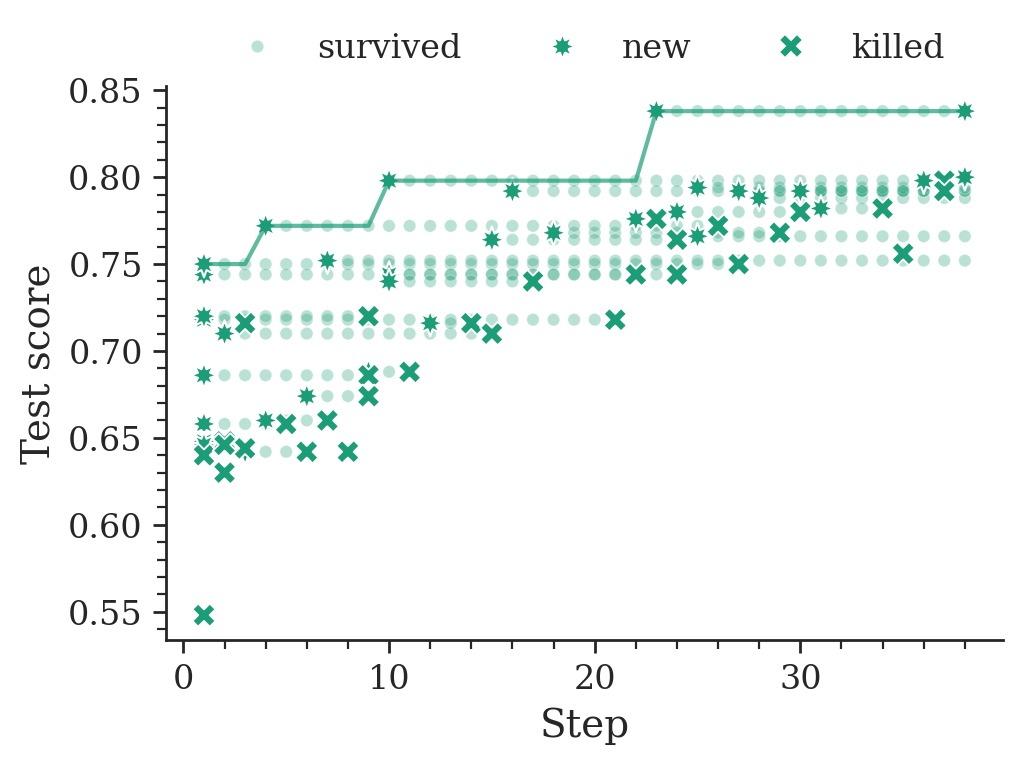

In [30]:
plot_population_members("subj", "mistral", "CAPO", x_col="step", score_col="test_score", seeds=[42]);

## Training Curves

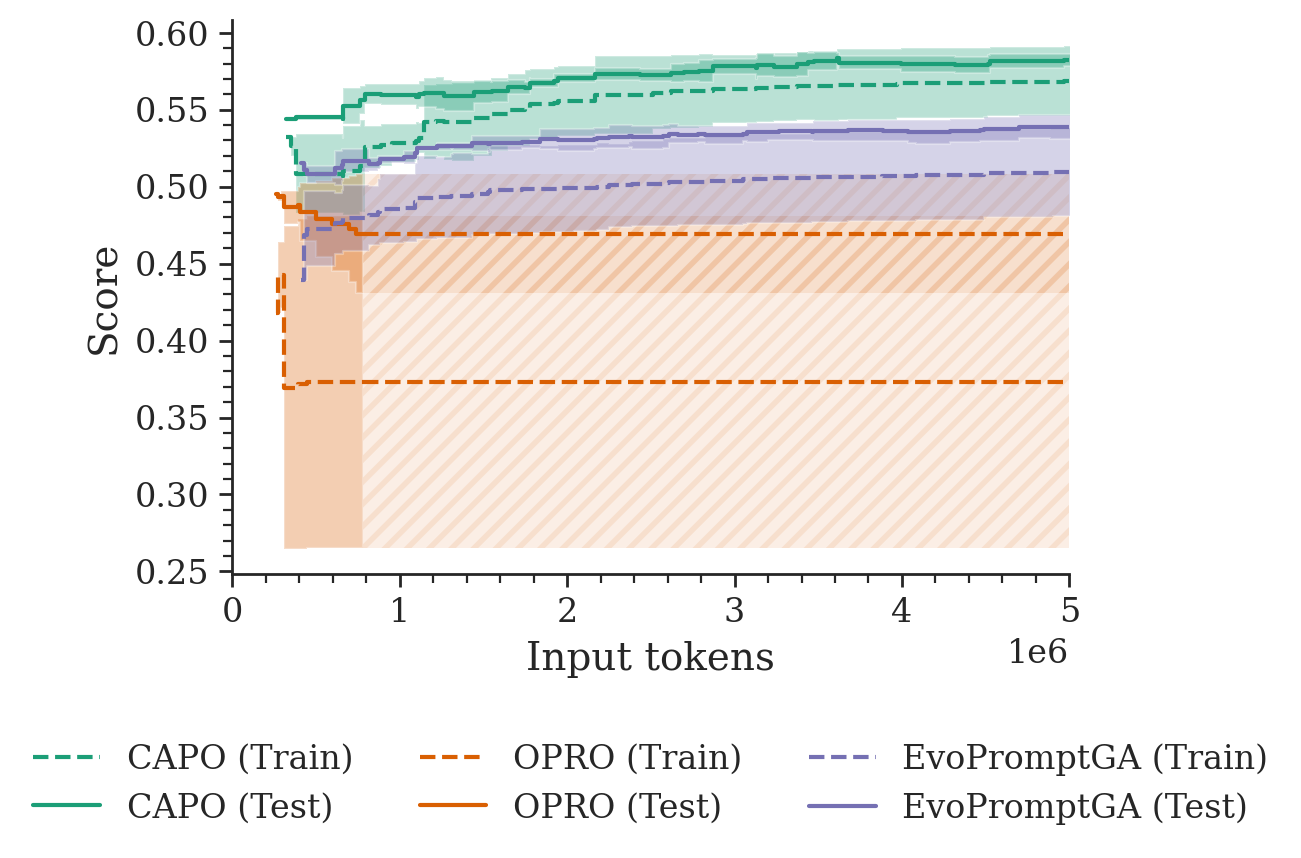

In [35]:
plot_train_test_comparison(
    "sst-5",
    "mistral",
    ["CAPO", "OPRO", "EvoPromptGA"],
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    add_title=False,
);

## Performance & Examples

In [32]:
from pprint import pprint as pp

In [33]:
# print best prompt per dataset, model, optimizer
for dataset in ["subj"]:
    for model in ["mistral"]:
        for optim in ["capo"]:
            print(f"Dataset: {dataset}, Model: {model}, Optimizer: {optim}")
            df = get_results(
                dataset=dataset,
                model=model,
                optim=optim,
            )

            if df.empty:
                continue
            p, s = df.nlargest(1, "test_score")[["prompt", "test_score"]].values[0]

            print(s)
            print("'''")
            pp(p)
            print("'''")

Dataset: subj, Model: mistral, Optimizer: capo
0.838
'''
('Identify whether the sentence presents factual information (objective) or '
 'conveves personal views (subjective). Provide the answer in the format: '
 '<final_answer>your_answer</final_answer>.\r\n'
 '\r\n'
 'Input:\r\n'
 'blueberry is stationed in the little town of palomito as sheriff .\r\n'
 'Output:\r\n'
 '<final_answer>objective</final_answer>\r\n'
 '\r\n'
 'Input:\r\n'
 'often hilarious , well-shot and , importantly , entertaining , hell house is '
 'a fascinating document of an event that has to be seen to be believed .\r\n'
 'Output:\r\n'
 '<final_answer>subjective</final_answer>\r\n'
 '\r\n'
 'Input:\r\n'
 'life on the rez is no picnic : this picture shows you why .\r\n'
 'Output:\r\n'
 '<final_answer>subjective</final_answer>\r\n'
 '\r\n'
 'Input:')
'''


capo can be very repetitive? (SST-5 mistral) potentially the crossover meta prompt has been misinterpreted (merge the two prompts) => however it is performing superior!

subj for qwen and llama with capo has a crazy outlier to the top
